In [1]:
import MetaTrader5 as mt5
import pandas as pd
# exibimos dados sobre o pacote MetaTrader5
print("MetaTrader5 package author: ",mt5.__author__)
print("MetaTrader5 package version: ",mt5.__version__)

# estabelecemos a conexão ao MetaTrader 5
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()


MetaTrader5 package author:  MetaQuotes Software Corp.
MetaTrader5 package version:  5.0.33


In [50]:
import MetaTrader5 as mt5
# exibimos dados sobre o pacote MetaTrader5
print("MetaTrader5 package author: ",mt5.__author__)
print("MetaTrader5 package version: ",mt5.__version__)
 
# estabelecemos a conexão ao MetaTrader 5
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()
 

ru_symbols=mt5.symbols_get("*IND*")
print('len(*WIND*): ', len(ru_symbols))
for s in ru_symbols:
    print(s.name)
print()
 
 
# concluímos a conexão ao terminal MetaTrader 5
mt5.shutdown()

MetaTrader5 package author:  MetaQuotes Software Corp.
MetaTrader5 package version:  5.0.33
len(*WIND*):  23
FIND
FIND11
INDX11
INDX
INDQ20
IND$
IND@
IND$D
IND$N
IND@D
IND@N
INDV20
INDZ20
INDG21
INDJ21
INDM21
INDQ21
INDV21
INDZ21
INDG22
INDJ22
INDM22
INDQ22



True

In [7]:
print("Show symbol_info(\"ITSA4\")._asdict():")
symbol_info_dict = mt5.symbol_info("ITSA4")._asdict()
for k,v in symbol_info_dict.items():
    print(f'{k}: {v}')

Show symbol_info("ITSA4")._asdict():
custom: False
chart_mode: 1
select: False
visible: False
session_deals: 0
session_buy_orders: 0
session_sell_orders: 0
volume: 0
volumehigh: 0
volumelow: 0
time: 0
digits: 2
spread: 0
spread_float: True
ticks_bookdepth: 32
trade_calc_mode: 32
trade_mode: 4
start_time: 0
expiration_time: 0
trade_stops_level: 0
trade_freeze_level: 0
trade_exemode: 3
swap_mode: 0
swap_rollover3days: 3
margin_hedged_use_leg: False
expiration_mode: 2
filling_mode: 3
order_mode: 127
order_gtc_mode: 0
option_mode: 0
option_right: 0
bid: 0.0
bidhigh: 0.0
bidlow: 0.0
ask: 0.0
askhigh: 0.0
asklow: 0.0
last: 0.0
lasthigh: 0.0
lastlow: 0.0
volume_real: 0.0
volumehigh_real: 0.0
volumelow_real: 0.0
option_strike: 0.0
point: 0.01
trade_tick_value: 0.01
trade_tick_value_profit: 0.01
trade_tick_value_loss: 0.01
trade_tick_size: 0.01
trade_contract_size: 1.0
trade_accrued_interest: 0.0
trade_face_value: 0.0
trade_liquidity_rate: 0.0
volume_min: 100.0
volume_max: 55209772.0
volume_ste

## Copy ticks from

In [89]:
from datetime import datetime
import MetaTrader5 as mt5
import pandas as pd

# import the 'pandas' module for displaying data obtained in the tabular form
pd.set_option('display.max_columns', 500) # number of columns to be displayed
pd.set_option('display.width', 1500)      # max table width to display
# import pytz module for working with time zone

import pytz

if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()
    
# set time zone to UTC
timezone = pytz.timezone("Etc/UTC")
# create 'datetime' object in UTC time zone to avoid the implementation of a local time zone offset
utc_from = datetime(2020, 1, 10, tzinfo=timezone)
# request 100 000 EURUSD ticks starting from 10.01.2019 in UTC time zone
ticks = mt5.copy_ticks_from("BIDI4", utc_from, 100000, mt5.COPY_TICKS_INFO)
print("Ticks received:",len(ticks))
 
# shut down connection to the MetaTrader 5 terminal
mt5.shutdown()
 
# display data on each tick on a new line
print("Display obtained ticks 'as is'")
count = 0
for tick in ticks:
    count+=1
    print(tick)
    if count >= 10:
        break
 


Ticks received: 60804
Display obtained ticks 'as is'
(1578649501, 17.48, 17.3, 0., 0, 1578649501585, 6, 0.)
(1578649503, 17.86, 17.3, 0., 0, 1578649503039, 2, 0.)
(1578649514, 17.86, 17.26, 0., 0, 1578649514178, 4, 0.)
(1578649514, 18., 17.26, 0., 0, 1578649514478, 2, 0.)
(1578649565, 18., 17.26, 0., 0, 1578649565899, 2, 0.)
(1578649578, 18., 17.26, 0., 0, 1578649578186, 4, 0.)
(1578649627, 18., 17.26, 0., 0, 1578649627804, 2, 0.)
(1578649642, 18., 17.26, 0., 0, 1578649642869, 4, 0.)
(1578649693, 18., 17.26, 0., 0, 1578649693620, 2, 0.)
(1578649718, 18., 17.26, 0., 0, 1578649718162, 4, 0.)


In [90]:
# create DataFrame out of the obtained data
ticks_frame = pd.DataFrame(ticks)
# convert time in seconds into the datetime format
ticks_frame['time']=pd.to_datetime(ticks_frame['time'], unit='s')
 
# display data
print("\nDisplay dataframe with ticks")
ticks_frame.head(40)


Display dataframe with ticks


,time,bid,ask,last,volume,time_msc,flags,volume_real
0,2020-01-10 09:45:01,17.48,17.30,0.00,0,1578649501585,6,0.0
1,2020-01-10 09:45:03,17.86,17.30,0.00,0,1578649503039,2,0.0
2,2020-01-10 09:45:14,17.86,17.26,0.00,0,1578649514178,4,0.0
3,2020-01-10 09:45:14,18.00,17.26,0.00,0,1578649514478,2,0.0
4,2020-01-10 09:46:05,18.00,17.26,0.00,0,1578649565899,2,0.0
5,2020-01-10 09:46:18,18.00,17.26,0.00,0,1578649578186,4,0.0
6,2020-01-10 09:47:07,18.00,17.26,0.00,0,1578649627804,2,0.0
7,2020-01-10 09:47:22,18.00,17.26,0.00,0,1578649642869,4,0.0
8,2020-01-10 09:48:13,18.00,17.26,0.00,0,1578649693620,2,0.0
9,2020-01-10 09:48:38,18.00,17.26,0.00,0,1578649718162,4,0.0


## Copy rates from 


In [36]:
from datetime import datetime
import MetaTrader5 as mt5
import pandas as pd
 
# import the 'pandas' module for displaying data obtained in the tabular form
pd.set_option('display.max_columns', 500) # number of columns to be displayed
pd.set_option('display.width', 1500)      # max table width to display
# import pytz module for working with time zone
import pytz
 
# establish connection to MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()
 
# set time zone to UTC
timezone = pytz.timezone("Etc/UTC")
# create 'datetime' object in UTC time zone to avoid the implementation of a local time zone offset
utc_from = datetime(2020, 1, 10, tzinfo=timezone)
# get 10 EURUSD H4 bars starting from 01.10.2020 in UTC time zone
rates = mt5.copy_rates_from("ITSA4", mt5.TIMEFRAME_M5, utc_from, 100)
 
# shut down connection to the MetaTrader 5 terminal
mt5.shutdown()
# display each element of obtained data in a new line
print("Display obtained data 'as is'")
for rate in rates:
    print(rate)
 


Display obtained data 'as is'
(1578504300, 13.26, 13.27, 13.25, 13.26, 467, 1, 163900)
(1578504600, 13.26, 13.27, 13.24, 13.24, 500, 1, 233500)
(1578504900, 13.24, 13.25, 13.22, 13.22, 761, 1, 368300)
(1578505200, 13.22, 13.23, 13.2, 13.21, 969, 1, 694900)
(1578505500, 13.22, 13.24, 13.2, 13.22, 455, 1, 359600)
(1578505800, 13.22, 13.25, 13.2, 13.23, 515, 1, 2723700)
(1578564300, 13.26, 13.3, 13.24, 13.26, 302, 1, 178300)
(1578564600, 13.26, 13.29, 13.25, 13.28, 201, 1, 115700)
(1578564900, 13.28, 13.28, 13.24, 13.24, 267, 1, 131300)
(1578565200, 13.24, 13.26, 13.21, 13.23, 473, 1, 381000)
(1578565500, 13.23, 13.26, 13.22, 13.26, 271, 1, 320200)
(1578565800, 13.25, 13.29, 13.25, 13.28, 300, 1, 471200)
(1578566100, 13.28, 13.29, 13.27, 13.27, 159, 1, 78300)
(1578566400, 13.27, 13.29, 13.26, 13.27, 215, 1, 182400)
(1578566700, 13.26, 13.27, 13.25, 13.25, 157, 1, 86800)
(1578567000, 13.26, 13.26, 13.21, 13.22, 310, 1, 237000)
(1578567300, 13.22, 13.22, 13.19, 13.19, 393, 1, 300200)
(15785

In [66]:
# create DataFrame out of the obtained data
rates_frame = pd.DataFrame(rates)
# convert time in seconds into the datetime format
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')
                           
# display data
print("\nDisplay dataframe with data")
print(rates_frame) 


Display dataframe with data
                  time   open   high    low  close  tick_volume  spread  real_volume
0  2020-01-08 17:25:00  13.26  13.27  13.25  13.26          467       1       163900
1  2020-01-08 17:30:00  13.26  13.27  13.24  13.24          500       1       233500
2  2020-01-08 17:35:00  13.24  13.25  13.22  13.22          761       1       368300
3  2020-01-08 17:40:00  13.22  13.23  13.20  13.21          969       1       694900
4  2020-01-08 17:45:00  13.22  13.24  13.20  13.22          455       1       359600
..                 ...    ...    ...    ...    ...          ...     ...          ...
95 2020-01-09 17:30:00  12.99  12.99  12.97  12.98          366       1       158800
96 2020-01-09 17:35:00  12.97  12.99  12.97  12.98          428       1       236100
97 2020-01-09 17:40:00  12.98  13.00  12.97  13.00          831       1       499600
98 2020-01-09 17:45:00  13.00  13.00  12.98  13.00         1057       1       400900
99 2020-01-09 17:50:00  13.00  13.05

In [67]:
rates_frame.head(25)
print(rates_frame.columns)
#feat = ['']
rates_frame.set_index('time')


Index(['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume'], dtype='object')


,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2020-01-08 17:25:00,13.26,13.27,13.25,13.26,467,1,163900
2020-01-08 17:30:00,13.26,13.27,13.24,13.24,500,1,233500
2020-01-08 17:35:00,13.24,13.25,13.22,13.22,761,1,368300
2020-01-08 17:40:00,13.22,13.23,13.20,13.21,969,1,694900
2020-01-08 17:45:00,13.22,13.24,13.20,13.22,455,1,359600
...,...,...,...,...,...,...,...
2020-01-09 17:30:00,12.99,12.99,12.97,12.98,366,1,158800
2020-01-09 17:35:00,12.97,12.99,12.97,12.98,428,1,236100
2020-01-09 17:40:00,12.98,13.00,12.97,13.00,831,1,499600


In [78]:
daily = rates_frame[['time', 'open', 'high', 'low', 'close', 'real_volume']]
daily = daily.set_index('time')

In [118]:
daily.values.tolist()


[[13.26, 13.27, 13.25, 13.26, 163900.0],
 [13.26, 13.27, 13.24, 13.24, 233500.0],
 [13.24, 13.25, 13.22, 13.22, 368300.0],
 [13.22, 13.23, 13.2, 13.21, 694900.0],
 [13.22, 13.24, 13.2, 13.22, 359600.0],
 [13.22, 13.25, 13.2, 13.23, 2723700.0],
 [13.26, 13.3, 13.24, 13.26, 178300.0],
 [13.26, 13.29, 13.25, 13.28, 115700.0],
 [13.28, 13.28, 13.24, 13.24, 131300.0],
 [13.24, 13.26, 13.21, 13.23, 381000.0],
 [13.23, 13.26, 13.22, 13.26, 320200.0],
 [13.25, 13.29, 13.25, 13.28, 471200.0],
 [13.28, 13.29, 13.27, 13.27, 78300.0],
 [13.27, 13.29, 13.26, 13.27, 182400.0],
 [13.26, 13.27, 13.25, 13.25, 86800.0],
 [13.26, 13.26, 13.21, 13.22, 237000.0],
 [13.22, 13.22, 13.19, 13.19, 300200.0],
 [13.19, 13.2, 13.13, 13.14, 680100.0],
 [13.14, 13.16, 13.13, 13.13, 224100.0],
 [13.13, 13.14, 13.08, 13.09, 395100.0],
 [13.09, 13.11, 13.07, 13.08, 483500.0],
 [13.09, 13.11, 13.08, 13.09, 451700.0],
 [13.09, 13.09, 13.03, 13.05, 582400.0],
 [13.05, 13.05, 12.95, 12.97, 929200.0],
 [12.98, 13.04, 12.96,

In [117]:
a = daily.open.tolist()
a




[13.26,
 13.26,
 13.24,
 13.22,
 13.22,
 13.22,
 13.26,
 13.26,
 13.28,
 13.24,
 13.23,
 13.25,
 13.28,
 13.27,
 13.26,
 13.26,
 13.22,
 13.19,
 13.14,
 13.13,
 13.09,
 13.09,
 13.09,
 13.05,
 12.98,
 13.04,
 13.03,
 13.03,
 13.05,
 13.1,
 13.09,
 13.09,
 13.12,
 13.12,
 13.13,
 13.1,
 13.09,
 13.13,
 13.13,
 13.13,
 13.15,
 13.15,
 13.15,
 13.16,
 13.15,
 13.12,
 13.13,
 13.13,
 13.14,
 13.14,
 13.13,
 13.12,
 13.11,
 13.11,
 13.12,
 13.11,
 13.09,
 13.08,
 13.06,
 13.03,
 13.01,
 13.03,
 13.0,
 13.03,
 13.03,
 13.0,
 13.01,
 13.0,
 12.99,
 12.99,
 12.99,
 12.99,
 13.0,
 13.0,
 13.0,
 12.99,
 13.0,
 12.98,
 12.98,
 12.99,
 13.0,
 12.98,
 12.98,
 12.99,
 12.99,
 13.01,
 13.02,
 13.03,
 13.01,
 13.02,
 13.03,
 13.02,
 13.05,
 13.04,
 12.99,
 12.99,
 12.97,
 12.98,
 13.0,
 13.0]

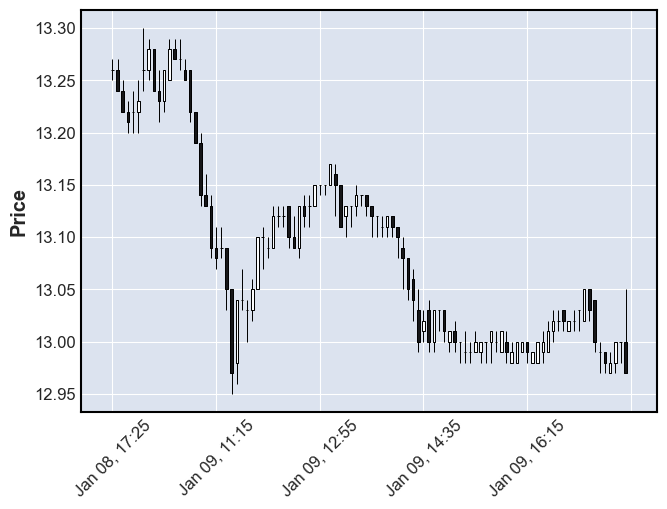

In [76]:
import mplfinance as mpf
mpf.plot(daily,type='candle')
